<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Top_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

In [ ]:
# Function to fetch the HTML content from the URL with retries and a delay
def fetch_page_with_retries_and_delay(url, retries=3, delay=10):  # Increased delay to 10 seconds
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    for i in range(retries):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.text
        elif response.status_code == 429:  # Added handling for 429 status code
            print(f"Request throttled. Retrying after {delay} seconds.")
            time.sleep(delay)
        else:
            print(f"Failed to fetch the page. Status code: {response.status_code}. Retry {i+1}/{retries}")
            time.sleep(delay + random.uniform(0, 2))  # Adding a random delay between 10 and 12 seconds

    return None

# Function to extract product details from a given URL
def extract_product_details(url):
    html_content = fetch_page_with_retries_and_delay(url)
    if html_content:
        soup = BeautifulSoup(html_content, 'html.parser')
        items = soup.select('div.p13n-sc-uncoverable-faceout')
        product_details = []
        for item in items:
            product_title_element = item.select_one('a.a-link-normal div._cDEzb_p13n-sc-css-line-clamp-3_g3dy1')
            product_title = product_title_element.get_text(strip=True) if product_title_element else 'No title'

            product_url_element = item.select_one('a.a-link-normal.aok-block')
            product_url = 'https://www.amazon.com' + product_url_element['href'] if product_url_element else 'No URL'

            img_element = item.select_one('img.a-dynamic-image')
            img_url = img_element['src'] if img_element else 'No image URL'

            product_star_rating_element = item.select_one('a.a-link-normal i.a-icon-star-small span.a-icon-alt')
            product_star_rating = product_star_rating_element.get_text(strip=True) if product_star_rating_element else 'No rating'

            product_num_ratings_element = item.select_one('a.a-link-normal span.a-size-small')
            product_num_ratings = product_num_ratings_element.get_text(strip=True) if product_num_ratings_element else 'No reviews count'

            product_price_element = item.select_one('span._cDEzb_p13n-sc-price_3mJ9Z')
            product_price = product_price_element.get_text(strip=True) if product_price_element else 'No price'

            product_details.append({
                'product_title': product_title,
                'product_url': product_url,
                'img_url': img_url,
                'product_star_rating': product_star_rating,
                'product_num_ratings': product_num_ratings,
                'product_price': product_price
            })
        return product_details
    else:
        print("Failed to fetch the page after multiple retries.")
        return []

# Define the URLs of the Amazon Best Sellers pages
url1 = "https://www.amazon.com/Best-Sellers-Beauty-Personal-Care-Skin-Care-Products/zgbs/beauty/11060451/ref=zg_bs_nav_beauty_1"
url2 = "https://www.amazon.com/Best-Sellers-Beauty-Personal-Care-Skin-Care-Products/zgbs/beauty/11060451/ref=zg_bs_pg_2_beauty?_encoding=UTF8&pg=2"

# Extract product details from both URLs
product_details_url1 = extract_product_details(url1)
product_details_url2 = extract_product_details(url2)

# Combine the results
all_product_details = product_details_url1 + product_details_url2

# Create DataFrame
df_top_amazon = pd.DataFrame(all_product_details)

# Display DataFrame
df_top_amazon.info()


Request throttled. Retrying after 10 seconds.
Request throttled. Retrying after 10 seconds.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_title        60 non-null     object
 1   product_url          60 non-null     object
 2   img_url              60 non-null     object
 3   product_star_rating  60 non-null     object
 4   product_num_ratings  60 non-null     object
 5   product_price        60 non-null     object
dtypes: object(6)
memory usage: 2.9+ KB


In [ ]:
# Save the DataFrame to an Excel file
df_top_amazon.to_excel("df_top_amazon.xlsx", index=False)

In [ ]:
# Read the Excel file into a DataFrame
df_top_amazon_2 = pd.read_excel("df_top_amazon_2.xlsx")

In [ ]:
# Read the Excel file into a DataFrame
df_top_amazon_1 = pd.read_excel("df_top_amazon_1.xlsx")

In [ ]:
# Concatenate the two DataFrames
df_top_amazon = pd.concat([df_top_amazon_1, df_top_amazon_2], ignore_index=True)

In [ ]:
# Drop duplicates
df_top_amazon = df_top_amazon.drop_duplicates()
df_top_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_title        90 non-null     object
 1   product_url          90 non-null     object
 2   img_url              90 non-null     object
 3   product_star_rating  90 non-null     object
 4   product_num_ratings  90 non-null     object
 5   product_price        90 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB


In [ ]:
# Drop duplicates based on the 'product_title' column, keeping only the first occurrence
df_top_amazon = df_top_amazon.drop_duplicates(subset='product_title', keep='last')
df_top_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 89
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_title        60 non-null     object
 1   product_url          60 non-null     object
 2   img_url              60 non-null     object
 3   product_star_rating  60 non-null     object
 4   product_num_ratings  60 non-null     object
 5   product_price        60 non-null     object
dtypes: object(6)
memory usage: 3.3+ KB


In [ ]:
# Save the DataFrame to an Excel file
df_top_amazon.to_excel("df_top_amazon_v1.xlsx", index=False)

In [ ]:
# Check for duplicates in the 'product_title' column
duplicates = df_top_amazon[df_top_amazon['product_title'].duplicated(keep=False)]

# Print the duplicated rows before dropping duplicates
print("Duplicated rows before dropping duplicates:")
print(duplicates)

Duplicated rows before dropping duplicates:
                                        product_title  \
30  Supergoop! Unseen Sunscreen - SPF 40-1.7 fl oz...   
31  Sun Bum SPF 30 Sunscreen Lip Balm | Vegan and ...   
32  Anua Heartleaf 77 Soothing Toner I pH 5.5 Trou...   
33  Thayers Alcohol-Free, Hydrating Rose Petal Wit...   
34  CeraVe Retinol Serum for Post-Acne Marks and S...   
35  CeraVe Eye Repair Cream | Under Eye Cream for ...   
36  ANUA Heartleaf Quercetinol Pore Deep Cleansing...   
37  Rael Pimple Patches, Miracle Invisible Spot Co...   
38  Vanicream Gentle Facial Cleanser with Pump Dis...   
39  Dial Antibacterial Foaming Hand Soap Refill, S...   
40  Softsoap Antibacterial Liquid Hand Soap Refill...   
41  Aquaphor Lip Repair Tubes, Lip Ointment for Ch...   
42  EltaMD UV Daily SPF 40 Tinted Face Sunscreen M...   
43  L’Oréal Paris Collagen Daily Face Moisturizer,...   
44  BIODANCE Bio-Collagen Real Deep Mask, Hydratin...   
45  Cetaphil Face & Body Moisturizer, Hydrat

In [ ]:
df_top_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_title        90 non-null     object
 1   product_url          90 non-null     object
 2   img_url              90 non-null     object
 3   product_star_rating  90 non-null     object
 4   product_num_ratings  90 non-null     object
 5   product_price        90 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB


In [ ]:
df_top_amazon = pd.read_excel('df_top_amazon_v1.xlsx')

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

# Function to fetch the HTML content from the URL with retries and a delay
def fetch_page_with_retries_and_delay(url, retries=3, delay=10):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    for i in range(retries):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.text
        elif response.status_code == 429:
            print(f"Request throttled. Retrying after {delay} seconds.")
            time.sleep(delay)
        else:
            print(f"Failed to fetch the page. Status code: {response.status_code}. Retry {i+1}/{retries}")
            time.sleep(delay + random.uniform(0, 2))

    return None

# Function to extract the sales volume from a given product URL
def extract_sales_volume(url):
    html_content = fetch_page_with_retries_and_delay(url)
    if html_content:
        soup = BeautifulSoup(html_content, 'html.parser')
        sales_volume_element = soup.select_one('div.a-section.social-proofing-faceout-title span.social-proofing-faceout-title-text span')
        if sales_volume_element:
            return sales_volume_element.get_text(strip=True)
    return 'No sales volume'

# Apply the function to each URL in the 'product_url' column
df_top_amazon['sales_volume_in_past_month'] = df_top_amazon['product_url'].apply(extract_sales_volume)

# Display the DataFrame with the extracted sales volumes
print(df_top_amazon)


Failed to fetch the page. Status code: 500. Retry 1/3
Failed to fetch the page. Status code: 500. Retry 1/3
Failed to fetch the page. Status code: 500. Retry 2/3
                                        product_title  \
0   Hero Cosmetics Mighty Patch™ Original Patch - ...   
1   Clean Skin Club Clean Towels XL™, 100% USDA Bi...   
2   Neutrogena Makeup Remover Wipes, Ultra-Soft Cl...   
3   PanOxyl Acne Foaming Wash Benzoyl Peroxide 10%...   
4   VALITIC Kojic Acid Dark Spot Remover Soap Bars...   
5   COSRX Snail Mucin 96% Power Repairing Essence ...   
6   eos Shea Better Body Lotion- Vanilla Cashmere,...   
7   BLUE LIZARD Sensitive Mineral Sunscreen with Z...   
8   CeraVe Moisturizing Cream | Body and Face Mois...   
9   Dove Body Wash with Pump Deep Moisture For Dry...   
10  EltaMD UV Clear Face Sunscreen, Oil Free Sunsc...   
11  Paulas Choice--SKIN PERFECTING 2% BHA Liquid S...   
12  CeraVe Hydrating Facial Cleanser | Moisturizin...   
13  Aquaphor Lip Repair Stick, Lip Prote

In [ ]:
# Function to extract brand name from HTML content fetched from URL
def extract_brand_name_from_url(url):
    try:
        # Fetch the HTML content from the URL
        response = requests.get(url)
        if response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(response.text, 'html.parser')

            # Try finding the brand name in the detailed section of the HTML content
            detailed_section = soup.find('div', class_='a-section a-spacing-small a-spacing-top-small')
            if detailed_section:
                brand_tr = detailed_section.find('tr', class_='a-spacing-small po-brand')
                if brand_tr:
                    brand_element = brand_tr.find('span', class_='a-size-base po-break-word')
                    if brand_element:
                        return brand_element.text.strip()
                    else:
                        print(f"Brand element not found in {url}")
                else:
                    print(f"Brand row not found in {url}")
            else:
                print(f"Detailed section not found in {url}")
        else:
            print(f"Failed to fetch the page. Status code: {response.status_code}")
        return None
    except Exception as e:
        print(f"Error while processing URL {url}: {e}")
        return None

# Apply the function to each URL in the 'product_url' column
df_top_amazon['brand'] = df_top_amazon['product_url'].apply(extract_brand_name_from_url)

# Display the DataFrame with the extracted brand names
print(df_top_amazon[['product_url', 'brand']])

Failed to fetch the page. Status code: 500
Brand row not found in https://www.amazon.com/Blue-Lizard-Sensitive-Mineral-Sunscreen/dp/B083VY5GVN/ref=zg_bs_g_11060451_d_sccl_8/134-1973457-0843326?psc=1
Brand row not found in https://www.amazon.com/EltaMD-Acne-Prone-Mineral-Based-Dermatologist-Recommended/dp/B002MSN3QQ/ref=zg_bs_g_11060451_d_sccl_11/134-1973457-0843326?psc=1
Failed to fetch the page. Status code: 500
Brand row not found in https://www.amazon.com/Neutrogena-Ultra-Dry-Touch-Sunscreen-Spectrum/dp/B005IHT94S/ref=zg_bs_g_11060451_d_sccl_17/134-1973457-0843326?psc=1
Brand row not found in https://www.amazon.com/Sun-Bum-Moisturizing-Protection-Hypoallergenic/dp/B004XGLDTY/ref=zg_bs_g_11060451_d_sccl_19/134-1973457-0843326?psc=1
Brand row not found in https://www.amazon.com/Solar-Buddies-friendly-Applicator-applicator/dp/B06XBPB9T4/ref=zg_bs_g_11060451_d_sccl_21/134-1973457-0843326?psc=1
Brand row not found in https://www.amazon.com/CeraVe-Sunscreen-Hydrating-Mineral-Titanium/dp/B

In [ ]:
# Replace None values with the first word from the 'product_title' column
df_top_amazon['brand'].fillna(df_top_amazon['product_title'].str.split().str[0], inplace=True)

df_top_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_title               60 non-null     object
 1   product_url                 60 non-null     object
 2   img_url                     60 non-null     object
 3   product_star_rating         60 non-null     object
 4   product_num_ratings         60 non-null     object
 5   product_price               60 non-null     object
 6   sales_volume_in_past_month  60 non-null     object
 7   brand                       60 non-null     object
dtypes: object(8)
memory usage: 3.9+ KB


In [ ]:
# Save the DataFrame to an Excel file
df_top_amazon.to_excel("df_top_amazon_v3.xlsx", index=False)

In [ ]:
df_top_amazon = pd.read_excel('df_top_amazon_v3.xlsx')
df_top_amazon.head()

,product_title,product_url,img_url,product_star_rating,product_num_ratings,product_price,sales_volume_in_past_month,brand
0,Hero Cosmetics Mighty Patch™ Original Patch - ...,https://www.amazon.com/Mighty-Patch-Hydrocollo...,https://images-na.ssl-images-amazon.com/images...,4.6 out of 5 stars,"144,425",$11.97,100K+ bought in past month,Mighty Patch
1,"Clean Skin Club Clean Towels XL™, 100% USDA Bi...",https://www.amazon.com/Clean-Skin-Club-Disposa...,https://images-na.ssl-images-amazon.com/images...,4.8 out of 5 stars,"22,063",$17.95,100K+ bought in past month,CLEAN SKIN CLUB
2,"Neutrogena Makeup Remover Wipes, Ultra-Soft Cl...",https://www.amazon.com/Neutrogena-Cleansing-To...,https://images-na.ssl-images-amazon.com/images...,4.8 out of 5 stars,"107,585",$9.94,100K+ bought in past month,Neutrogena
3,PanOxyl Acne Foaming Wash Benzoyl Peroxide 10%...,https://www.amazon.com/PanOxyl-Foaming-Peroxid...,https://images-na.ssl-images-amazon.com/images...,4.6 out of 5 stars,"60,869",$9.77,100K+ bought in past month,PanOxyl
4,VALITIC Kojic Acid Dark Spot Remover Soap Bars...,https://www.amazon.com/Valitic-Remover-Vitamin...,https://images-na.ssl-images-amazon.com/images...,4.1 out of 5 stars,"27,628",$11.99,80K+ bought in past month,VALITIC


In [ ]:
# Removing the '$' sign and converting to float
df_top_amazon['product_price'] = df_top_amazon['product_price'].str.replace('$', '').astype(float)

In [ ]:
# Remove the 'K+ bought in past month' from the values and convert them to numeric format
df_top_amazon['sales_volume_in_past_month'] = df_top_amazon['sales_volume_in_past_month'].str.replace('K+ bought in past month', '000').astype(int)

In [ ]:
# Remove the 'out of 5 stars' from the of product_star_rating
df_top_amazon['product_star_rating'] = df_top_amazon['product_star_rating'].str.replace(' out of 5 stars', '').astype(float)

In [ ]:
df_top_amazon['product_num_ratings'] = df_top_amazon['product_num_ratings'].str.replace(',', '').astype(int)

In [ ]:
df_top_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_title               57 non-null     object 
 1   product_url                 57 non-null     object 
 2   img_url                     57 non-null     object 
 3   product_star_rating         57 non-null     float64
 4   product_num_ratings         57 non-null     int64  
 5   product_price               57 non-null     float64
 6   sales_volume_in_past_month  57 non-null     int64  
 7   brand                       57 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.7+ KB


In [ ]:
# Save the DataFrame to an Excel file
df_top_amazon.to_excel("df_top_amazon_v4.xlsx", index=False)

In [ ]:
df_top_amazon = pd.read_excel('df_top_amazon_v4.xlsx')
df_top_amazon.head()

,product_title,product_url,img_url,product_star_rating,product_num_ratings,product_price,sales_volume_in_past_month,brand
0,Hero Cosmetics Mighty Patch™ Original Patch - ...,https://www.amazon.com/Mighty-Patch-Hydrocollo...,https://images-na.ssl-images-amazon.com/images...,4.6,144425,11.97,100000,Mighty Patch
1,"Clean Skin Club Clean Towels XL™, 100% USDA Bi...",https://www.amazon.com/Clean-Skin-Club-Disposa...,https://images-na.ssl-images-amazon.com/images...,4.8,22063,17.95,100000,CLEAN SKIN CLUB
2,"Neutrogena Makeup Remover Wipes, Ultra-Soft Cl...",https://www.amazon.com/Neutrogena-Cleansing-To...,https://images-na.ssl-images-amazon.com/images...,4.8,107585,9.94,100000,Neutrogena
3,PanOxyl Acne Foaming Wash Benzoyl Peroxide 10%...,https://www.amazon.com/PanOxyl-Foaming-Peroxid...,https://images-na.ssl-images-amazon.com/images...,4.6,60869,9.77,100000,PanOxyl
4,VALITIC Kojic Acid Dark Spot Remover Soap Bars...,https://www.amazon.com/Valitic-Remover-Vitamin...,https://images-na.ssl-images-amazon.com/images...,4.1,27628,11.99,80000,VALITIC


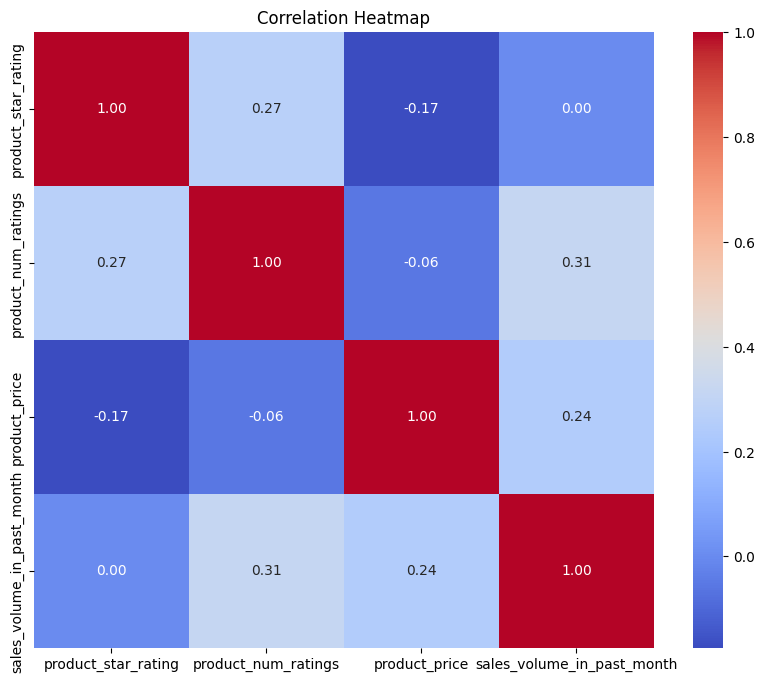

In [ ]:
# Include boolean columns along with numerical columns
numerical_columns = df_top_amazon.select_dtypes(include=['number', 'bool']).columns

# Compute correlation matrix
correlation_matrix = df_top_amazon[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# List of item forms to search for
item_forms = [
    'cream', 'lotion', 'serum', 'gel', 'oil', 'balm', 'mask',
    'cleanser', 'toner', 'essence', 'mist', 'sunscreen', 'exfoliant',
    'ampoule', 'patches', 'wipes', 'foam', 'scrub', 'roller', 'patch', 'headbands',
    'ointment', 'treatment', 'set', 'cleansing', 'kit', 'supplement', 'powder',
    'fluid', 'màsk', 'pads', 'cloths', 'emulsion', 'wash', 'liquid', 'crem', 'moisturizer',
    'tool', 'skincare', 'tonic', 'towel', 'towels', 'butter', 'spray', 'moisture', 'moisturizer',
    'trio', 'tweezer', 'stick'
]

# Function to find the first matching item form in the product title
def find_item_form(title):
    for form in item_forms:
        if form.lower()=='crem' in title.lower():
          return 'cream'
        elif form.lower()=='patch' in title.lower():
          return 'patches'
        elif form.lower()=='màsk' in title.lower():
          return 'mask'
        elif form.lower()=='towel' in title.lower():
          return 'towels'
        elif form.lower()=='moisture' in title.lower():
            return 'moisturizer'
        elif form.lower()=='trio' in title.lower():
            return 'set'
        elif form.lower()=='cleansing' in title.lower():
            return 'cleanser'
        elif form.lower() in title.lower():
            return form
    return 'other'  # If no match is found

# Apply the function to the product_title column to create a new item_form column
df_top_amazon['item_form'] = df_top_amazon['product_title'].apply(find_item_form)

# Filter the DataFrame to get rows where item_form is 'Other'
other_items = df_top_amazon[df_top_amazon['item_form'] == 'other']

# Print the product titles of the filtered rows
print(other_items[['product_title', 'product_url']])

Empty DataFrame
Columns: [product_title, product_url]
Index: []


In [ ]:
# List of special keywords
special_keywords = ['lip', 'lips', 'eye', 'eyes', 'face', 'facial', 'foot', 'hand', 'hands', 'body', 'age', 'aging', 'cleansing', 'shave', 'men', 'man', 'skin', 'sun', 'acne']

# Function to find the first matching special keyword in the product title
def find_special_keyword(title):
    for kw in special_keywords:
        if kw.lower() == 'man' in title.lower():
            return 'men'
        elif kw.lower() == 'facial' in title.lower():
            return 'face'
        elif kw.lower() == 'lip' in title.lower():
            return 'lips'
        elif kw.lower() == 'eyes' in title.lower():
            return 'eye'
        elif kw.lower() == 'hands' in title.lower():
            return 'hand'
        elif kw.lower() == 'aging' in title.lower():
            return 'age'
        elif kw in title.lower():
            return kw
    return ''  # If no match is found

# Create a new column 'special_keyword' by applying the find_special_keyword function
df_top_amazon['cosmetic_object'] = df_top_amazon['product_title'].apply(find_special_keyword)

# Create a new column 'special_form' by combining keywords and item_forms
df_top_amazon['special_item_form'] = df_top_amazon['cosmetic_object'] + ' ' + df_top_amazon['item_form']

# Filter the DataFrame to get rows where item_form is 'Other'
other_special_items = df_top_amazon[df_top_amazon['cosmetic_object'] == '']

# Print the product titles of the filtered rows
print(other_special_items['product_title'])

Series([], Name: product_title, dtype: object)


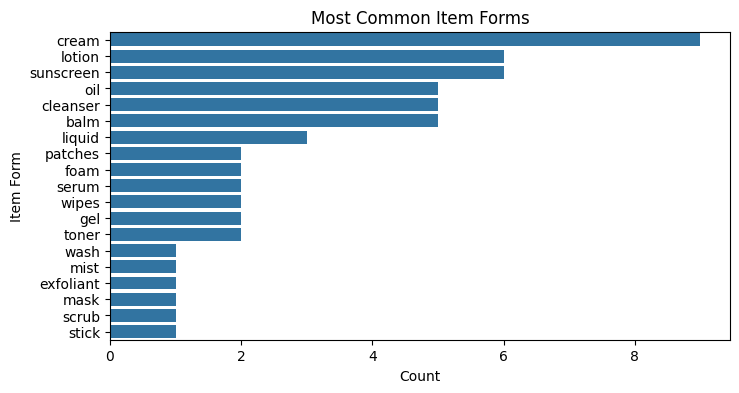

In [ ]:
# Set the size of the plot
plt.figure(figsize=(8, 4))

# Plot the counts of each item form
sns.countplot(y='item_form', data=df_top_amazon, order=df_top_amazon['item_form'].value_counts().index)

# Set the title and labels
plt.title('Most Common Item Forms')
plt.xlabel('Count')
plt.ylabel('Item Form')

# Show the plot
plt.show()

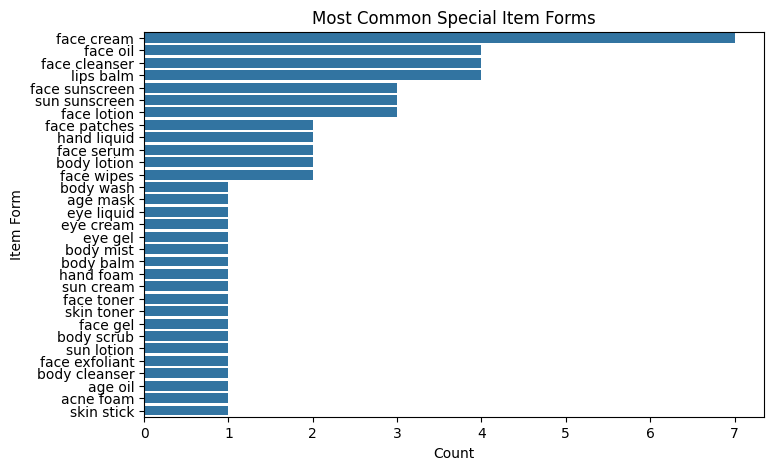

In [ ]:
# Set the size of the plot
plt.figure(figsize=(8, 5))

# Plot the counts of each item form
sns.countplot(y='special_item_form', data=df_top_amazon, order=df_top_amazon['special_item_form'].value_counts().index)

# Set the title and labels
plt.title('Most Common Special Item Forms')
plt.xlabel('Count')
plt.ylabel('Item Form')

# Show the plot
plt.show()

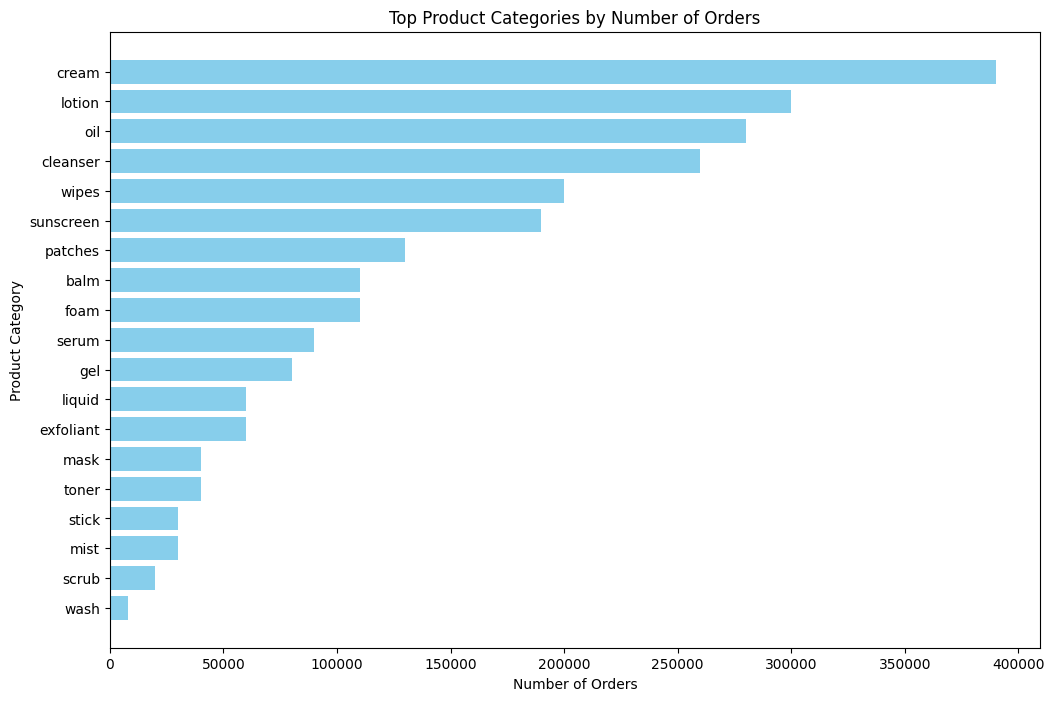

In [ ]:
# Group the DataFrame by the 'special_item_form' column and sum the 'sales_volume_in_past_month' for each category
orders_by_category = df_top_amazon.groupby('item_form')['sales_volume_in_past_month'].sum().reset_index()

# Sort the DataFrame by the number of orders in descending order
orders_by_category = orders_by_category.sort_values(by='sales_volume_in_past_month', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(orders_by_category['item_form'], orders_by_category['sales_volume_in_past_month'], color='skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.title('Top Product Categories by Number of Orders')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest category on top
plt.show()

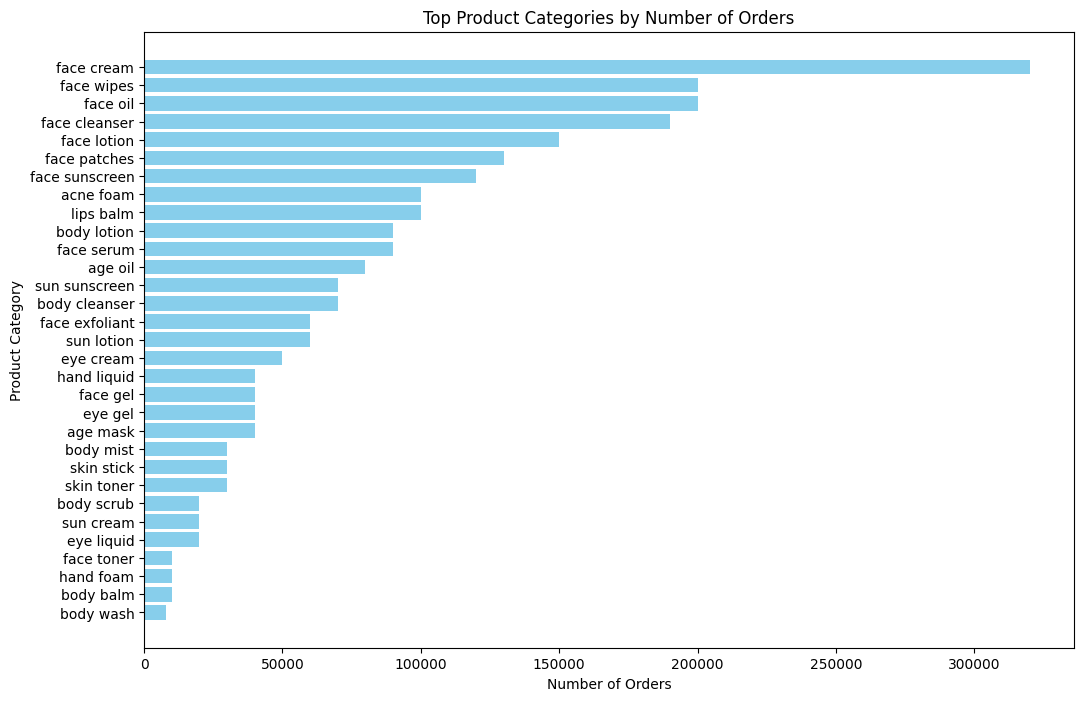

In [ ]:
# Group the DataFrame by the 'special_item_form' column and sum the 'sales_volume_in_past_month' for each category
orders_by_category = df_top_amazon.groupby('special_item_form')['sales_volume_in_past_month'].sum().reset_index()

# Sort the DataFrame by the number of orders in descending order
orders_by_category = orders_by_category.sort_values(by='sales_volume_in_past_month', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(orders_by_category['special_item_form'], orders_by_category['sales_volume_in_past_month'], color='skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.title('Top Product Categories by Number of Orders')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest category on top
plt.show()

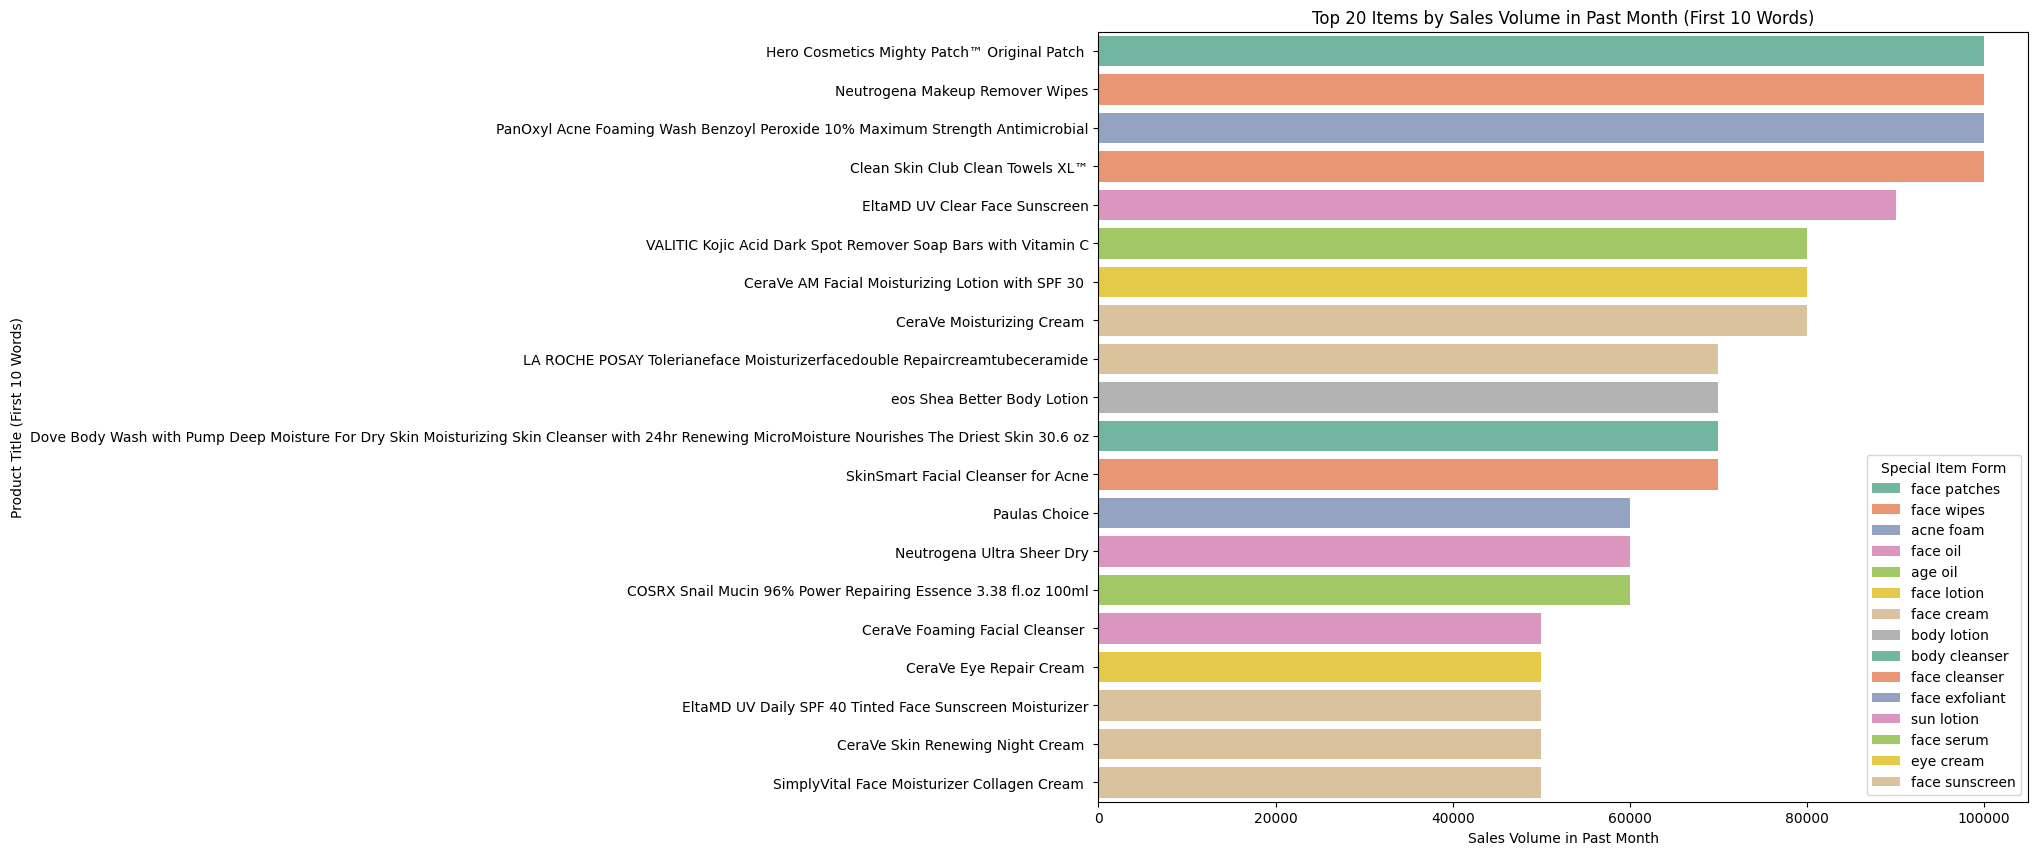

In [ ]:
# Sort the DataFrame by sales_volume_in_past_month in descending order and select the top 20 rows
top_20_sales_items = df_top_amazon.sort_values(by='sales_volume_in_past_month', ascending=False).head(20)

# Split the product titles into words using the specified separators and select the first 10 words
separators = r',|\\|/|\||;|-'
top_20_sales_items['product_title_short'] = top_20_sales_items['product_title'].str.split(separators, n=1).str[0]

# Sort the DataFrame by sales volume and reset the index
sorted_top_20_sales_items = top_20_sales_items.sort_values(by='sales_volume_in_past_month', ascending=False).reset_index(drop=True)

# Create the bar plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='sales_volume_in_past_month', y='product_title_short', data=sorted_top_20_sales_items, hue='special_item_form', palette='Set2')
plt.title('Top 20 Items by Sales Volume in Past Month (First 10 Words)')
plt.xlabel('Sales Volume in Past Month')
plt.ylabel('Product Title (First 10 Words)')
plt.legend(title='Special Item Form', loc='lower right')

plt.show()

In [ ]:
# Save the DataFrame to an Excel file
df_top_amazon.to_excel("df_top_amazon_v5.xlsx", index=False)